In [13]:
import pandas as pd
import numpy as np
import os
import string
from string import digits
import itertools
#separate words and POS tagging
import jieba
import jieba.posseg as pseg
import re
from os import path
import jieba.analyse as analyse

In [2]:
#input data and change to string
os.chdir('/home/jia/Desktop/git/STB_social_media_analytics/ctrip/200216_102752/reviews')
data=pd.read_csv('./1.csv')

#read all the review files
path = '/home/jia/Desktop/git/STB_social_media_analytics/ctrip/200216_102752/reviews'
for i in range(2,519):
    try:
        data=data.append(pd.read_csv(path+'/{}.csv'.format(i)))
    except:
        print(str(i)+' not exist')
        continue

373 not exist


In [3]:
data=data.drop(['REVIEW_INDEX','WEBSITE_INDEX','POI_INDEX','REVIEWER_NAME','REVIEW_RATING','REVIEW_DATE',
                'REVIEW_TIME','ATTRIBUTES_CRAWLED_TIME'],axis=1)
string1=list(map(lambda x: str(x),data['REVIEW_BODY']))

In [6]:
#input stop words
os.chdir('/home/jia/Desktop/git/STB_social_media_analytics/experimentation/jiaxin_experiment/descriptive_stats/data')
stop=pd.read_csv('./stop_words.txt',header=None,index_col=False)
stop=list(stop.iloc[:,0])

In [7]:
#remove stop words and separate text
def jiebaclearText(text,stoplist):
    mywordlist = []
    seg_list = pseg.cut(text, use_paddle=True)
    for word, flag in seg_list:
        if flag in ['v','nz','ns','LOC','ORG','vd','vn','n','LOC']:
            if word not in stoplist:
                mywordlist.append(word)
    return mywordlist

In [9]:
jieba.enable_paddle() #启动paddle模式。 0.40版之后开始支持，早期版本不支持
pos=[]
for i in range(len(string1)):
    pos.append(jiebaclearText(string1[i],stop))
pos

Paddle enabled successfully......


[['新加坡',
  '环球影城 ',
  ' ',
  '位于',
  '圣淘沙',
  '名胜',
  '世界',
  '东南亚',
  '环球影城主题公园',
  '开放',
  '新加坡环球影城',
  '共有',
  '景点',
  '新加坡',
  '设计',
  '游玩',
  'USS',
  '推荐',
  '变形',
  '金刚',
  '主题',
  '项目',
  '电影',
  '过山车',
  '特效',
  '游客',
  '身临其境',
  '跟随',
  '变形金刚们',
  '大冒险，',
  '回味无穷',
  '世界',
  '双轨',
  '过山车',
  '一人',
  '坐',
  '一人',
  '悬挂',
  '擦身',
  '错过',
  '项目',
  '埃及',
  '世界',
  '主题',
  '区',
  '超级棒',
  '游乐',
  '项目',
  '值得',
  '试'],
 [' 新加坡',
  '奇幻',
  '世界',
  ' ',
  '嗨',
  '值得',
  '大，',
  '玩儿',
  '惯',
  '北京欢乐谷',
  '回来',
  '不屑',
  ' ',
  '项目',
  '排队',
  '玩儿',
  '印象',
  '山车',
  '爱',
  '坐',
  '过山车',
  '意料之中，',
  '没想到',
  '气氛',
  '时间',
  '车',
  '停下',
  '倒，',
  '坐',
  '推荐',
  '找到',
  '主题',
  '区域',
  '表演',
  '时间',
  '别错过',
  '一个人',
  '不完',
  '，玩儿',
  '好莱坞大道',
  '溜达',
  '溜达',
  '吃',
  '东西',
  '夜景',
  '别错过',
  '累',
  '腿',
  '断',
  '放松'],
 ['游乐场',
  '少不了',
  '刺激',
  '游乐场',
  '新加坡环球影城',
  '。 ',
  '新加坡环球影城',
  '拥有',
  '古埃及',
  '世界',
  '好莱坞',
  '主题',
  '区',
  '电影',
  '建造',
  '经典',
  '经典',
  '值得',
  '木乃伊复仇

In [26]:
#preparing text for LDA
text = list(itertools.chain(*pos))

In [42]:
cn_punc="！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
text=list(map(lambda x :x.translate(str.maketrans('', '',string.punctuation+cn_punc )), text))

In [43]:
text = ' '.join(text).split()

In [47]:
#LDA
from gensim import corpora, models, similarities
from gensim.models import LdaModel
from gensim.models import ldaseqmodel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary, bleicorpus
import pyLDAvis.gensim
import numpy
from gensim.matutils import hellinger

In [49]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import ast

%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams.update({'font.size': 22})

In [56]:
text=[text]


[['新加坡',
  '环球影城',
  '位于',
  '圣淘沙',
  '名胜',
  '世界',
  '东南亚',
  '环球影城主题公园',
  '开放',
  '新加坡环球影城',
  '共有',
  '景点',
  '新加坡',
  '设计',
  '游玩',
  'USS',
  '推荐',
  '变形',
  '金刚',
  '主题',
  '项目',
  '电影',
  '过山车',
  '特效',
  '游客',
  '身临其境',
  '跟随',
  '变形金刚们',
  '大冒险',
  '回味无穷',
  '世界',
  '双轨',
  '过山车',
  '一人',
  '坐',
  '一人',
  '悬挂',
  '擦身',
  '错过',
  '项目',
  '埃及',
  '世界',
  '主题',
  '区',
  '超级棒',
  '游乐',
  '项目',
  '值得',
  '试',
  '新加坡',
  '奇幻',
  '世界',
  '嗨',
  '值得',
  '大',
  '玩儿',
  '惯',
  '北京欢乐谷',
  '回来',
  '不屑',
  '项目',
  '排队',
  '玩儿',
  '印象',
  '山车',
  '爱',
  '坐',
  '过山车',
  '意料之中',
  '没想到',
  '气氛',
  '时间',
  '车',
  '停下',
  '倒',
  '坐',
  '推荐',
  '找到',
  '主题',
  '区域',
  '表演',
  '时间',
  '别错过',
  '一个人',
  '不完',
  '玩儿',
  '好莱坞大道',
  '溜达',
  '溜达',
  '吃',
  '东西',
  '夜景',
  '别错过',
  '累',
  '腿',
  '断',
  '放松',
  '游乐场',
  '少不了',
  '刺激',
  '游乐场',
  '新加坡环球影城',
  '新加坡环球影城',
  '拥有',
  '古埃及',
  '世界',
  '好莱坞',
  '主题',
  '区',
  '电影',
  '建造',
  '经典',
  '经典',
  '值得',
  '木乃伊复仇记太空堡垒',
  '侏罗纪',
  '河流',
  '探险',
  '木乃

In [60]:
dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(word) for word in text]
time_slice = [] # 如果要做dtm，后面就省略在这里写了

In [62]:
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

In [64]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.35055976562882446


In [66]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  1.0000889005818406e-12


In [67]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


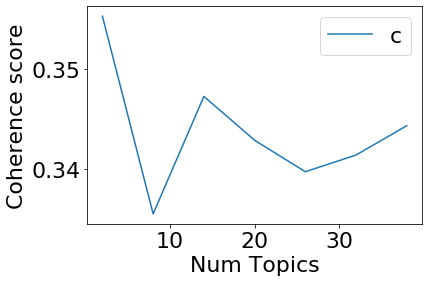

In [69]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text, start=2, limit=40, step=6)

# Show graph

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()